# Load file

In [69]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale,robust_scale,minmax_scale,maxabs_scale
import datetime
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns


In [70]:
data='./training.csv'
train=pd.read_csv(data)


train=pd.DataFrame(data=train)


    여기서 문제점 자동차가 얼마나 오래된지는 구입날짜와 판매날짜를 통해 유추가능한 데이터다. 어떤걸 남기고 없앨지 고민해보자....
    
판매날짜를 없앤다. 이유는 구입날짜가 중요한 이유는 그때 나온 차의 연식이 중요할 수 있다. 뿐만아니라 오래된 정도는 자동차의 나이로 기록으로 알수 있으므로 vehyear삭제

# 결측값 데이터 채우기

In [71]:
train=train.drop(["VehYear"],axis=1)
train=train.drop(["RefId"],axis=1)
train=train.drop(["Model"],axis=1)
train=train.drop(["Trim"],axis=1)
train=train.drop(["SubModel"],axis=1)
train=train.drop(["WheelTypeID"],axis=1)
train=train.drop(["PRIMEUNIT"],axis=1)
train=train.drop(["AUCGUART"],axis=1)
train=train.drop(["VNZIP1"],axis=1)
train=train.drop(["PurchDate"],axis=1)
train=train.drop(["BYRNO"],axis=1)

In [3]:
train.shape

a=train["PurchDate"][1]

a


a=parse(a)
a


a.strftime("%m/%Y")

'12/2009'

In [285]:
b=train["PurchDate"]

In [286]:
c=[]
for i in range(len(b)):
    k=parse(train["PurchDate"][i])
    k=k.strftime("%m/%Y")
    c.append(k)
# 날짜데이터 변환

train["PurchDate"]=c

In [5]:
train.isnull().sum()

IsBadBuy                                0
Auction                                 0
VehicleAge                              0
Make                                    0
Color                                   8
Transmission                            9
WheelType                            3174
VehOdo                                  0
Nationality                             5
Size                                    5
TopThreeAmericanName                    5
MMRAcquisitionAuctionAveragePrice      18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitonRetailCleanPrice          18
MMRCurrentAuctionAveragePrice         315
MMRCurrentAuctionCleanPrice           315
MMRCurrentRetailAveragePrice          315
MMRCurrentRetailCleanPrice            315
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
dtype: int64

# 결측값 데이터 찾아서 채우기

In [41]:
print(train.loc[train['Transmission']=="MANUAL"])

       IsBadBuy Auction  VehicleAge       Make   Color Transmission WheelType  \
4             0   ADESA           4       FORD  SILVER       MANUAL    Covers   
11            0   ADESA           8       FORD   WHITE       MANUAL     Alloy   
15            0   ADESA           6  CHEVROLET   WHITE       MANUAL    Covers   
33            0   ADESA           5       FORD   BLACK       MANUAL     Alloy   
51            0   ADESA           4     SATURN    GREY       MANUAL    Covers   
54            0   ADESA           5       FORD   WHITE       MANUAL    Covers   
84            0   ADESA           6    PONTIAC    BLUE       MANUAL     Alloy   
93            0   ADESA           7  CHEVROLET  SILVER       MANUAL    Covers   
123           0   ADESA           6       JEEP  SILVER       MANUAL     Alloy   
127           0   ADESA           6     SATURN     RED       MANUAL     Alloy   
138           0   ADESA           5      MAZDA    GREY       MANUAL     Alloy   
139           0   ADESA     

In [42]:
len(train["Transmission"])

72983

In [43]:
print np.where(train["Transmission"].isnull()==True)

(array([15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450]),)


In [44]:
train.ix[70450]

IsBadBuy                                    0
Auction                                 ADESA
VehicleAge                                  3
Make                                     FORD
Color                                     NaN
Transmission                              NaN
WheelType                                 NaN
VehOdo                                  80212
Nationality                          AMERICAN
Size                                      VAN
TopThreeAmericanName                     FORD
MMRAcquisitionAuctionAveragePrice        4899
MMRAcquisitionAuctionCleanPrice          6033
MMRAcquisitionRetailAveragePrice         5791
MMRAcquisitonRetailCleanPrice            7016
MMRCurrentAuctionAveragePrice            5750
MMRCurrentAuctionCleanPrice              7186
MMRCurrentRetailAveragePrice             6710
MMRCurrentRetailCleanPrice               8261
BYRNO                                   19662
VNST                                       TX
VehBCost                          

In [45]:
train.loc[[15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450]]["Transmission"]

15906    NaN
24567    NaN
24578    NaN
70432    NaN
70434    NaN
70437    NaN
70445    NaN
70446    NaN
70450    NaN
Name: Transmission, dtype: object

In [46]:
train.loc[[15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450]]

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost
15906,0,MANHEIM,4,MERCURY,RED,NaN,Alloy,76640,AMERICAN,LARGE,...,10274.0,7107.0,7948.0,10946.0,11577.0,25100,TX,7695.0,0,1506
24567,0,MANHEIM,3,DODGE,NaN,NaN,NaN,46150,AMERICAN,MEDIUM,...,7478.0,5480.0,6461.0,6418.0,7478.0,99750,FL,6200.0,0,975
24578,0,MANHEIM,3,DODGE,NaN,NaN,NaN,60781,AMERICAN,MEDIUM,...,7478.0,5616.0,6535.0,6565.0,7558.0,99750,FL,6200.0,0,1215
70432,0,ADESA,8,CHEVROLET,NaN,NaN,NaN,81122,AMERICAN,SMALL TRUCK,...,4184.0,2858.0,3800.0,3587.0,4604.0,19064,TX,4770.0,0,2322
70434,0,ADESA,5,CHEVROLET,NaN,NaN,NaN,82062,AMERICAN,LARGE,...,6009.0,4023.0,5219.0,4845.0,6137.0,19662,TX,4470.0,0,2152
70437,0,ADESA,5,PONTIAC,NaN,NaN,NaN,86471,AMERICAN,MEDIUM,...,5290.0,3810.0,5001.0,4615.0,5901.0,18822,TX,4170.0,0,2412
70445,0,ADESA,7,CHEVROLET,NaN,NaN,NaN,76964,AMERICAN,COMPACT,...,3420.0,1961.0,2611.0,2618.0,3320.0,19064,TX,3170.0,0,1455
70446,1,ADESA,7,MERCURY,NaN,NaN,NaN,85546,AMERICAN,MEDIUM SUV,...,6054.0,3779.0,5143.0,4581.0,6054.0,19662,TX,5180.0,0,2193
70450,0,ADESA,3,FORD,NaN,NaN,NaN,80212,AMERICAN,VAN,...,7016.0,5750.0,7186.0,6710.0,8261.0,19662,TX,4970.0,0,1633


In [72]:
train.loc[[15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450],["Transmission"]]="AUTO"



In [73]:
train.loc[[15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450],["Transmission"]]

,Transmission
15906,AUTO
24567,AUTO
24578,AUTO
70432,AUTO
70434,AUTO
70437,AUTO
70445,AUTO
70446,AUTO
70450,AUTO


# 결측값 데이터  삭제

In [74]:
train.dropna(subset=["Color"], inplace=True)

In [75]:
print np.where(train["MMRAcquisitionAuctionAveragePrice"].isnull()==True)

(array([  736,  5860,  6550,  7384, 11815, 13252, 13254, 25335, 26133,
       26775, 30276, 36383, 36511, 52063, 64929, 67008, 68542, 69720]),)


In [76]:
train.dropna(subset=["MMRAcquisitionAuctionAveragePrice"], inplace=True)

train.dropna(subset=["MMRCurrentAuctionAveragePrice"], inplace=True)

train.dropna(subset=["Size"], inplace=True)

train.loc[train["WheelType"].isnull(),"WheelType"]="Alloy"

train.loc[train['Transmission']=="Manual","Transmission"]="MANUAL"

# 카테고리 데이터 변환

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [100]:
category_col=["Auction","Make","Color","Transmission","WheelType","Nationality","Size","TopThreeAmericanName","VNST","IsOnlineSale"]

def change_category(df):
    le=LabelEncoder()
    le.fit(df)
    a=le.transform(df)
    
    return a

for col in category_col:
        train[col]=change_category(train[col])
    
    


In [27]:
set(train["Auction"])

{0, 1, 2}

In [28]:
train

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale,WarrantyCost,AuctionAve
0,0,0,3,17,12,0,0,89046,2,5,3,5,0,1113,10403.625
1,0,0,5,5,14,0,0,93593,0,4,0,5,0,1053,9943.625
2,0,0,4,5,7,0,1,73807,0,5,0,5,0,1389,6100.250
3,0,0,5,5,13,0,0,65617,0,0,0,5,0,630,3662.375
4,0,0,4,6,13,1,1,69367,0,0,1,5,0,1020,5959.750
5,0,0,5,20,14,0,1,81054,2,5,3,5,0,594,6528.500
6,0,0,5,14,1,0,1,65328,2,5,3,5,0,533,5458.500
7,0,0,4,6,14,0,1,65805,0,5,1,5,0,825,5688.000
8,0,0,2,14,1,0,1,49921,2,5,3,5,0,482,8498.000
9,0,0,2,6,12,0,0,84872,0,2,1,5,0,1633,11320.875


In [78]:
dfx=train.ix[:,1:-1]

In [79]:
dfy=train.ix[:,0]

In [80]:
x_train=dfx
y_train=dfy

# 연속 변수 스케일링

In [203]:
train["VehOdo"]=scale(train["VehOdo"])
train["MMRAcquisitionAuctionAveragePrice"]=scale(train["MMRAcquisitionAuctionAveragePrice"])
train["MMRAcquisitionAuctionCleanPrice"]=scale(train["MMRAcquisitionAuctionCleanPrice"])


In [205]:
train["MMRCurrentAuctionAveragePrice"]=scale(train["MMRCurrentAuctionAveragePrice"])
train["MMRAcquisitonRetailCleanPrice"]=scale(train["MMRAcquisitonRetailCleanPrice"])

# 데이터 분포 보기

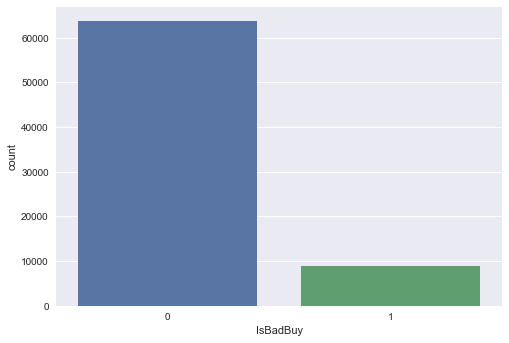

In [216]:
sns.countplot(train["IsBadBuy"])
plt.show()

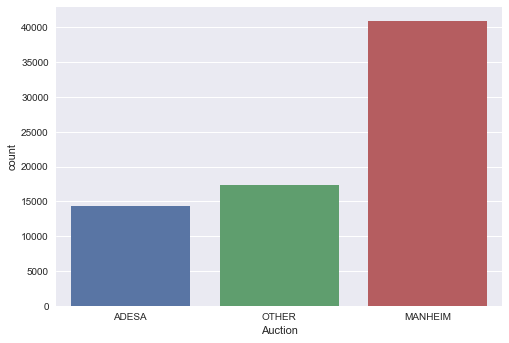

In [217]:
sns.countplot(train["Auction"])
plt.show()

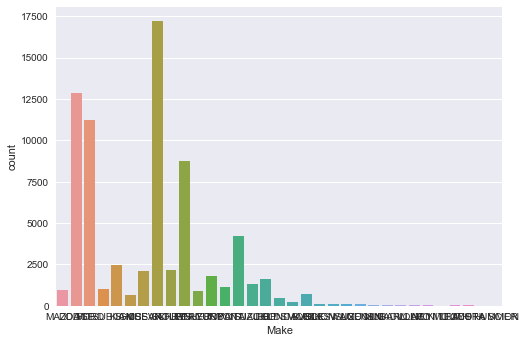

In [218]:
sns.countplot(train["Make"])
plt.show()

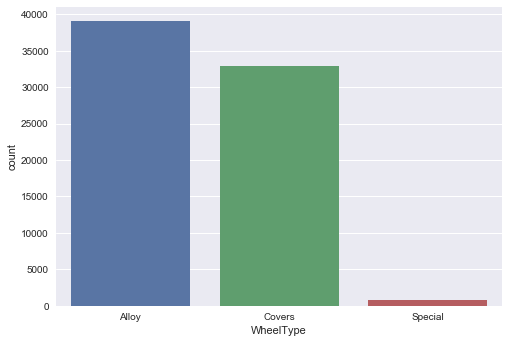

In [219]:
sns.countplot(train["WheelType"])
plt.show()

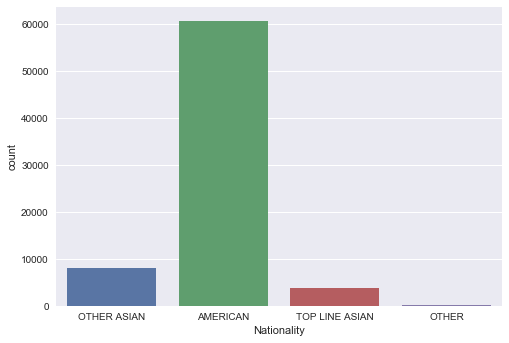

In [220]:
sns.countplot(train["Nationality"])
plt.show()

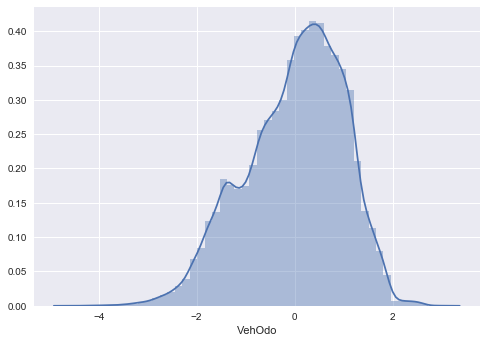

In [221]:
sns.distplot(train["VehOdo"])
plt.show()

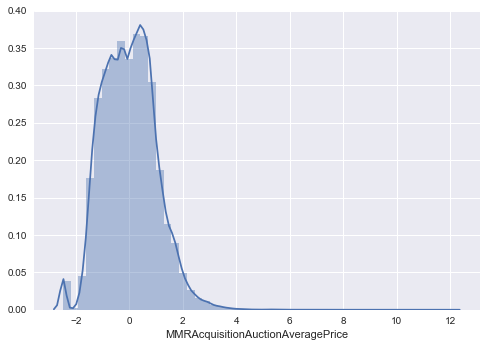

In [222]:
sns.distplot(train["MMRAcquisitionAuctionAveragePrice"])
plt.show()

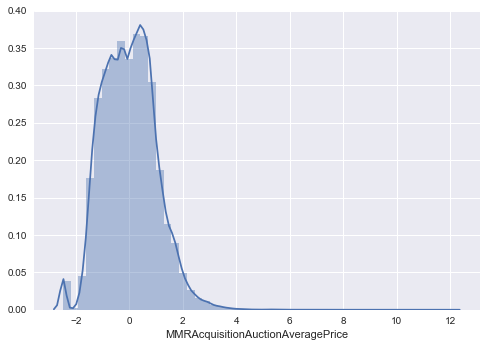

In [223]:
sns.distplot(train["MMRAcquisitionAuctionAveragePrice"])
plt.show()

# Q-Q플롯

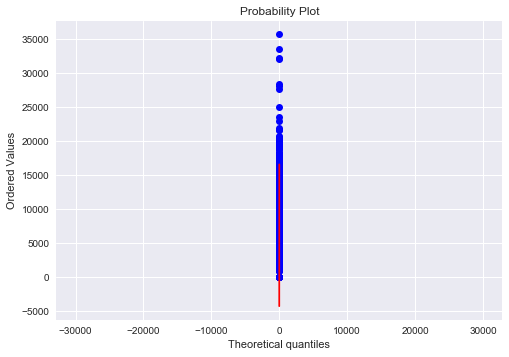

In [51]:
import scipy as sp
sp.stats.probplot(train["MMRAcquisitionAuctionAveragePrice"], plot=plt)
plt.axis("equal")
plt.show()

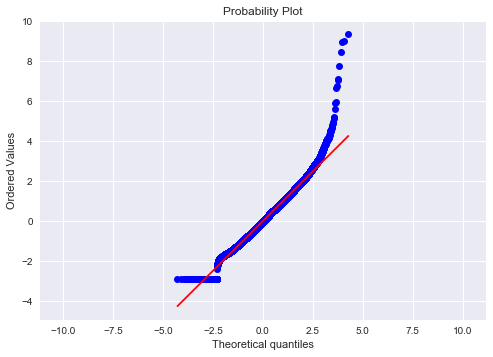

In [225]:

sp.stats.probplot(train["MMRAcquisitonRetailCleanPrice"], plot=plt)
plt.axis("equal")
plt.show()

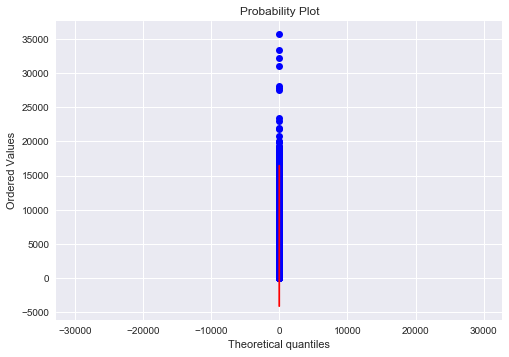

In [55]:

sp.stats.probplot(train["MMRCurrentAuctionAveragePrice"], plot=plt)
plt.axis("equal")
plt.show()

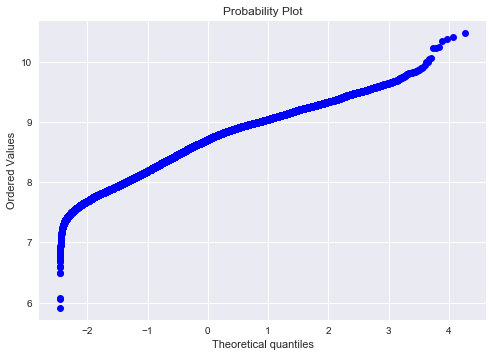

In [53]:

sp.stats.probplot(a, plot=plt)
plt.axis("equal")
plt.show()


In [16]:
num_col=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                        'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

# 다중 공산성

In [17]:
x=dfx.corr()


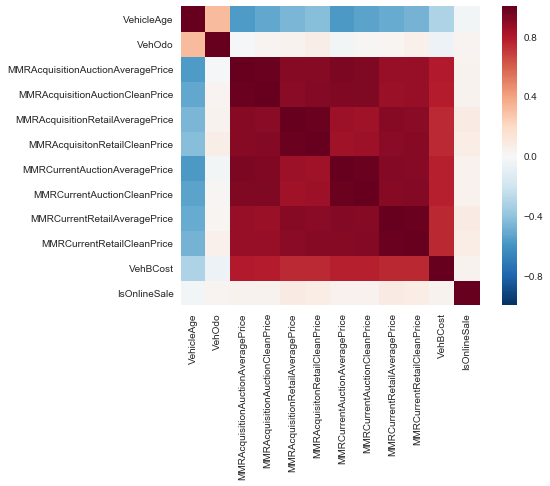

In [18]:

sns.heatmap(x,square=True)
plt.show()


In [19]:
x

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale
VehicleAge,1.000000,0.317653,-0.565181,-0.518742,-0.460741,-0.426637,-0.575566,-0.532460,-0.504013,-0.469305,-0.311496,-0.025180
VehOdo,0.317653,1.000000,-0.015310,0.025791,0.032712,0.064189,-0.028507,0.012166,0.015885,0.048077,-0.060674,0.029509
MMRAcquisitionAuctionAveragePrice,-0.565181,-0.015310,1.000000,0.990405,0.910408,0.910371,0.937812,0.932487,0.871742,0.871028,0.789563,0.038811
MMRAcquisitionAuctionCleanPrice,-0.518742,0.025791,0.990405,1.000000,0.902646,0.918259,0.923605,0.932109,0.860703,0.871191,0.781295,0.038587
MMRAcquisitionRetailAveragePrice,-0.460741,0.032712,0.910408,0.902646,1.000000,0.990213,0.851630,0.849391,0.913090,0.906035,0.745771,0.080477
MMRAcquisitonRetailCleanPrice,-0.426637,0.064189,0.910371,0.918259,0.990213,1.000000,0.846898,0.855675,0.903170,0.906793,0.744757,0.077465
MMRCurrentAuctionAveragePrice,-0.575566,-0.028507,0.937812,0.923605,0.851630,0.846898,1.000000,0.990328,0.915067,0.912225,0.778710,0.039868
MMRCurrentAuctionCleanPrice,-0.532460,0.012166,0.932487,0.932109,0.849391,0.855675,0.990328,1.000000,0.908663,0.921532,0.775073,0.040232
MMRCurrentRetailAveragePrice,-0.504013,0.015885,0.871742,0.860703,0.913090,0.903170,0.915067,0.908663,1.000000,0.989758,0.756772,0.079527
MMRCurrentRetailCleanPrice,-0.469305,0.048077,0.871028,0.871191,0.906035,0.906793,0.912225,0.921532,0.989758,1.000000,0.756620,0.076578


### 공분산성은 양의 방향으로도 문제가 되지만 음의 방향으로도 문제가 된다. 

mmr가격들을 합해서 그것의 평균을 구한다. 왜냐하면 그 경향성이 비슷하고 공분산성떄문이다.

In [81]:
train["AuctionAve"]=sum(train[a] for a in num_col)/len(num_col)
train=train.drop(num_col,axis=1)
    

In [82]:
train

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,VehBCost,IsOnlineSale,WarrantyCost,AuctionAve
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,FL,7100.0,0,1113,10403.625
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,FL,7600.0,0,1053,9943.625
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,FL,4900.0,0,1389,6100.250
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,FL,4100.0,0,630,3662.375
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,FL,4000.0,0,1020,5959.750
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,FL,5600.0,0,594,6528.500
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,FL,4200.0,0,533,5458.500
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,FL,4500.0,0,825,5688.000
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,FL,5600.0,0,482,8498.000
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,FL,7700.0,0,1633,11320.875


In [83]:
train.shape

(72659, 16)

In [87]:
new_train_cor=train.corr()

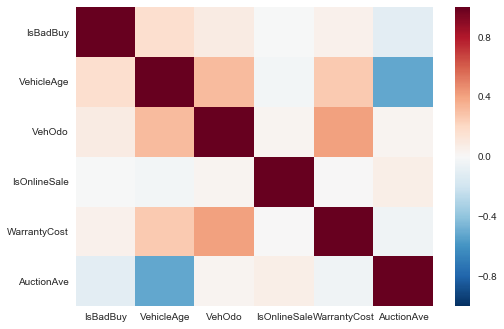

In [88]:
sns.heatmap(new_train_cor)
plt.show()

In [85]:
train=train.drop(["VehBCost"],axis=1)
train

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale,WarrantyCost,AuctionAve
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,FL,0,1113,10403.625
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,FL,0,1053,9943.625
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,FL,0,1389,6100.250
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,FL,0,630,3662.375
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,FL,0,1020,5959.750
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,FL,0,594,6528.500
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,FL,0,533,5458.500
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,FL,0,825,5688.000
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,FL,0,482,8498.000
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,FL,0,1633,11320.875


In [26]:
import statsmodels.api as sm

### 샘플 밸랜싱, 샘플 스케일링, 아웃라이어제거, 더미변수분석

#### 더미변수 변수가 스트링일때는 라벨링을 한  이후 원핫으로 더미변수로 변환

In [30]:
category_col=["Auction","Make","Color","Transmission","WheelType","Nationality","Size","TopThreeAmericanName","VNST","IsOnlineSale"]

def change_category_to_onehot(df):
    one=OneHotEncoder()
    one.fit(df)
    a=one.transform(df)
    
    return a

for col in category_col:
        train[col]=change_category_to_onehot(train[col])
    
    


c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\skle

In [89]:
train

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale,WarrantyCost,AuctionAve
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,FL,0,1113,10403.625
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,FL,0,1053,9943.625
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,FL,0,1389,6100.250
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,FL,0,630,3662.375
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,FL,0,1020,5959.750
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,FL,0,594,6528.500
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,FL,0,533,5458.500
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,FL,0,825,5688.000
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,FL,0,482,8498.000
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,FL,0,1633,11320.875


# 정상과 비정상 거래 구분및 언더 샘플링

In [101]:
good_train=train.loc[train["IsBadBuy"]==0]
bad_train=train.loc[train["IsBadBuy"]==1]

In [102]:
len(bad_train)

8943

In [103]:
good_index=train[train["IsBadBuy"]==0].index

In [104]:
w=np.random.choice(good_index,8943,replace=False)

In [105]:
sample_good=train.loc[w]

In [107]:
merge_sample=pd.concat([sample_good,bad_train],ignore_index=True)


In [118]:
merge_sample

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale,WarrantyCost
0,0,2,4,3,14,0,0,65012,0,5,2,3,0,1118
1,0,2,3,3,7,0,0,78191,0,2,2,30,0,1974
2,0,1,5,25,14,0,1,45457,0,5,2,4,0,623
3,0,0,5,18,14,0,0,84695,0,5,1,2,0,983
4,0,2,2,4,1,0,1,65108,0,5,0,3,0,1215
5,0,0,3,28,13,1,1,24135,2,5,3,26,0,462
6,0,1,3,3,13,0,1,81684,0,2,2,32,0,2152
7,0,1,2,3,3,0,0,70983,0,5,2,5,0,1272
8,0,1,5,5,2,0,0,74347,0,11,0,5,0,1623
9,0,2,3,3,14,0,1,44521,0,2,2,3,0,1328


In [119]:
merge_sample=merge_sample.drop(["AuctionAve"],axis=1)


ValueError: labels ['AuctionAve'] not contained in axis

In [120]:
merge_sample.ix[:,1:]

,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale,WarrantyCost
0,2,4,3,14,0,0,65012,0,5,2,3,0,1118
1,2,3,3,7,0,0,78191,0,2,2,30,0,1974
2,1,5,25,14,0,1,45457,0,5,2,4,0,623
3,0,5,18,14,0,0,84695,0,5,1,2,0,983
4,2,2,4,1,0,1,65108,0,5,0,3,0,1215
5,0,3,28,13,1,1,24135,2,5,3,26,0,462
6,1,3,3,13,0,1,81684,0,2,2,32,0,2152
7,1,2,3,3,0,0,70983,0,5,2,5,0,1272
8,1,5,5,2,0,0,74347,0,11,0,5,0,1623
9,2,3,3,14,0,1,44521,0,2,2,3,0,1328


In [122]:
merge_sample_x=merge_sample.ix[:,1:]
merge_sample_y=merge_sample.ix[:,0]

In [123]:
merge_sample_y=merge_sample.ix[:,0]
merge_sample_y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
17856    1
17857    1
17858    1
17859    1
17860    1
17861    1
17862    1
17863    1
17864    1
17865    1
17866    1
17867    1
17868    1
17869    1
17870    1
17871    1
17872    1
17873    1
17874    1
17875    1
17876    1
17877    1
17878    1
17879    1
17880    1
17881    1
17882    1
17883    1
17884    1
17885    1
Name: IsBadBuy, dtype: int64

# 로지스틱 회귀분석

In [126]:
x=sm.add_constant(merge_sample_x)
logit_mod=sm.Logit(merge_sample_y,x)
result=logit_mod.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651859
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               IsBadBuy   No. Observations:                17886
Model:                          Logit   Df Residuals:                    17872
Method:                           MLE   Df Model:                           13
Date:                Mon, 10 Apr 2017   Pseudo R-squ.:                 0.05957
Time:                        15:30:46   Log-Likelihood:                -11659.
converged:                       True   LL-Null:                       -12398.
                                        LLR p-value:                3.992e-308
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2320      0.104    -11.892      0.000      -1.435      -1.029

In [133]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x,merge_sample_y)


In [128]:
merge_sample2=merge_sample.copy()


In [135]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(merge_sample_y,model.predict(x)))

[[5236 3707]
 [3249 5694]]


In [140]:
from sklearn.metrics import classification_report
print (classification_report(merge_sample_y,model.predict(x)))

             precision    recall  f1-score   support

          0       0.62      0.59      0.60      8943
          1       0.61      0.64      0.62      8943

avg / total       0.61      0.61      0.61     17886



In [141]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(merge_sample_y,model.decision_function(x))


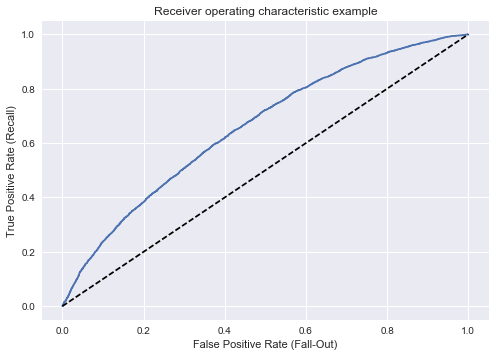

In [142]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()
